In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time

#### Função da secante e o seu plot.

In [43]:
def sech2(x):
    y = np.array(2 / (np.exp(x) + np.exp(-x))) * np.array(2 / (np.exp(x) + np.exp(-x)))
    return y

#### Começando a plotar os valores para a função XOR : 

In [44]:
x = np.array((0, 0, 0, 1, 1, 0, 1, 1)).reshape(4, 2)
y = np.array((-1, 1, 1, -1, 1, -1, -1, 1)).reshape(4, 2)
print(f" Inputs : \n{x}. \n Labels : \n{y}.")

 Inputs : 
[[0 0]
 [0 1]
 [1 0]
 [1 1]]. 
 Labels : 
[[-1  1]
 [ 1 -1]
 [ 1 -1]
 [-1  1]].


#### Inicializando todos os pesos da primeira camada como valores aleatórios.

In [45]:
w15 = np.random.random(1) - 0.5
w16 = np.random.random(1) - 0.5

w25 = np.random.random(1) - 0.5
w26 = np.random.random(1) - 0.5

w35 = np.random.random(1) - 0.5
w36 = np.random.random(1) - 0.5

print(f"Bias : ({w15}, {w16}). \n First Input : ({w25}, {w26}). \n Second Input : ({w35}, {w36}).")

Bias : ([0.08480977], [-0.09483099]). 
 First Input : ([-0.01100949], [-0.49189301]). 
 Second Input : ([-0.10757964], [0.37951666]).


#### Mudando a semente e inicializando todos os pesos da camada intermediária como valores aleatórios.

In [46]:
np.random.seed(np.random.randint(0, 10000))
w48 = np.random.random(1) - 0.5
w49 = np.random.random(1) - 0.5

w58 = np.random.random(1) - 0.5
w59 = np.random.random(1) - 0.5

w68 = np.random.random(1) - 0.5
w69 = np.random.random(1) - 0.5

print(f"Bias : ({w48}, {w49}). \n First Last Neuron Input : ({w58}, {w59}). \n Second Last Neuron Input : ({w68}, {w69}).")

Bias : ([-0.47913422], [0.13816356]). 
 First Last Neuron Input : ([-0.1724998], [0.32149175]). 
 Second Last Neuron Input : ([-0.08836844], [-0.23175749]).


#### Algoritmo de aprendizado :

In [47]:
num_epochs = 0
tol = 0.1
err_epochs = tol + 1
max_epochs = 1000
N = 4 # Número de entradas.
eta = 0.01 # Learning_rate.
err_vec = np.zeros(max_epochs)

In [48]:
matH = np.zeros((N, 2))

In [49]:
sequence = np.arange(start = 1, stop = N + 1, step = 1).tolist()
seq_randomized = random.sample(population = sequence, k = N)
seq_randomized

[2, 3, 1, 4]

In [50]:
x.shape, matH.shape

((4, 2), (4, 2))

In [51]:
y[0,1]

1

In [52]:
while((num_epochs < max_epochs) and (err_epochs > tol)):
    sequence = np.arange(start = 0, stop = N, step = 1).tolist()
    seq_randomized = random.sample(population = sequence, k = N)
    err2 = 0
    for i in range(N):
        # Pegando entradas aleatórias.
        rand_input = seq_randomized[i]
        input1 = x[rand_input, 0]
        input2 = x[rand_input, 1]


        # Pegando as saídas das entradas aleatórias.
        output1 = y[rand_input, 0]
        output2 = y[rand_input, 1]

        # Inicializando o valor dos biases da camada de entrada e da camada de saída.
        bias1 = 1
        bias2 = 1


        # Fazendo a combinação linear dos dois neurônios de saída e aplicando a função de ativação sigmoidal.
        comb_n1 = (bias1*w15) + (input1*w25) + (input2*w35)
        comb_n2 = (bias1*w16) + (input1*w26) + (input2*w36)
        tanh_n1 = np.tanh(comb_n1)
        tanh_n2 = np.tanh(comb_n2)


        # Fazendo a combinação linear dos dois neutônios de entrada e aplicando a função de ativação sigmoidal.
        comb_n11 = (bias2*w48) + (tanh_n1*w58) + (tanh_n2*w68)
        comb_n22 = (bias2*w49) + (tanh_n1*w59) + (tanh_n2*w69)
        tanh_n11 = np.tanh(comb_n11)
        tanh_n22 = np.tanh(comb_n22)

        matH[rand_input, 0] = tanh_n11
        matH[rand_input, 1] = tanh_n22
        

        # Calculo do erro e a retropropagação dos erros.
        err_output1 = (output1 - tanh_n11)
        err_output2 = (output2 - tanh_n22)
        delta_output1 = err_output1*sech2(comb_n11) # Lembrar que delta(N) = e*f'(u) SEMPRE.
        delta_output2 = err_output2*sech2(comb_n22) # Lembrar que delta(N) = e*f'(u) SEMPRE.



        # Atualização dos pesos : 
        dw48 = (eta*delta_output1*bias2) # atualização do peso do bias da camada de saída.
        dw49 = (eta*delta_output2*bias2) # atualização do peso do bias da camada de saída.

        
        dw58 = (eta*delta_output1*tanh_n1) # atualização do peso do bias da camada de saída.
        dw59 = (eta*delta_output2*tanh_n1) # atualização do peso do bias da camada de saída.


        dw68 = (eta*delta_output1*tanh_n2) # atualização do peso do bias da camada de saída.
        dw69 = (eta*delta_output2*tanh_n2) # atualização do peso do bias da camada de saída.
        
        # Calculando o delta dos neurônios da camada de entrada e a retropropragação da camada de entrada.
        delta_input1 = (delta_output1*w58 + delta_output2*w59)*sech2(comb_n1)
        delta_input2 = (delta_output1*w68 + delta_output2*w69)*sech2(comb_n2)

        dw15 = eta*delta_input1*bias1
        dw16 = eta*delta_input2*bias1

        
        dw25 = eta*delta_input1*input1
        dw26 = eta*delta_input2*input1

        
        dw35 = eta*delta_input1*input2
        dw36 = eta*delta_input2*input2


        # Atualização de todos os pesos da rede.

        w15 = w15 + dw15
        w16 = w16 + dw16

        w25 = w25 + dw25
        w26 = w26 + dw26

        w35 = w35 + dw35
        w36 = w36 + dw36

        w48 = w48 + dw48
        w49 = w49 + dw49
        
        w58 = w58 + dw58
        w59 = w59 + dw59
        
        w68 = w68 + dw68
        w69 = w69 + dw69

        err2 = err2 + (err_output1**2 + err_output2)/4
        
        
    err_vec[num_epochs] = err2/N
    num_epochs += 1


/tmp/ipykernel_26692/2954989309.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  matH[rand_input, 0] = tanh_n11
/tmp/ipykernel_26692/2954989309.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  matH[rand_input, 1] = tanh_n22
/tmp/ipykernel_26692/2954989309.py:97: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  err_vec[num_epochs] = err2/N


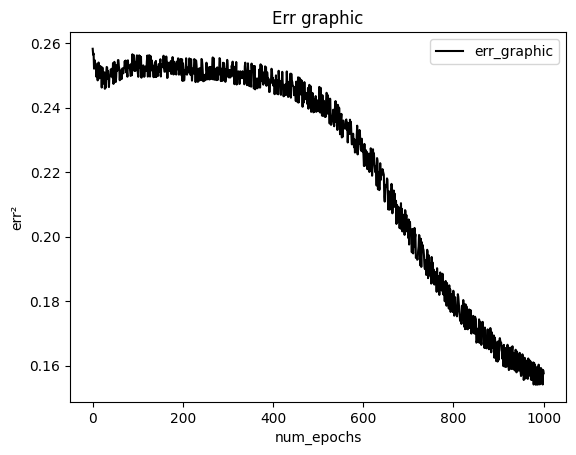

In [53]:
x_plot = np.linspace(start = 0, stop = num_epochs, num = num_epochs)
plt.plot(x_plot, err_vec, color = 'black', label = 'err_graphic')
plt.title('Err graphic')
plt.xlabel('num_epochs')
plt.ylabel('err²')
plt.legend()
plt.show()

In [54]:
for i in range(N):
    c1 = (bias1*w15) + (x[i, 0]*w25) + (x[i, 1]*w35)
    c2 = (bias1*w16) + (x[i, 0]*w26) + (x[i, 1]*w36)
    tan_c1 = np.tanh(c1)
    tan_c2 = np.tanh(c2)

    co1 = (bias2*w48) + (tan_c1*w58) + (tan_c2*w68)
    co2 = (bias2*w49) + (tan_c1*w59) + (tan_c2*w69)
    print(f"Para a entrada ({x[i,0]}, {x[i,1]}) a saída é ({np.tanh(co1)}, {np.tanh(co2)})")

Para a entrada (0, 0) a saída é ([-0.60467957], [0.61886616])
Para a entrada (0, 1) a saída é ([0.71605627], [-0.71933922])
Para a entrada (1, 0) a saída é ([-0.11593197], [0.11148717])
Para a entrada (1, 1) a saída é ([-0.0183771], [0.01143906])
